In [1]:
date()

[1] "Mon Nov  7 10:21:43 2022"

In [2]:
setwd("~/../Downloads/spoTour")
source("myTSP-helper.R")

Warning message:
"package 'TSP' was built under R version 4.2.2"
Warning message:
"package 'sf' was built under R version 4.2.1"
Linking to GEOS 3.9.1, GDAL 3.4.3, PROJ 7.2.1; sf_use_s2() is TRUE

Loading required package: sp

Loading required package: maps

Warning message:
"package 'maps' was built under R version 4.2.1"
Loading required package: gpclib

General Polygon Clipper Library for R (version 1.5-6)
	Type 'class ? gpc.poly' for help

Loading required package: rgeos

Warning message:
"package 'rgeos' was built under R version 4.2.2"
rgeos version: 0.5-9, (SVN revision 684)
 GEOS runtime version: 3.9.3-CAPI-1.14.3 
 Please note that rgeos will be retired by the end of 2023,
plan transition to sf functions using GEOS at your earliest convenience.
 GEOS using OverlayNG
 Linking to sp version: 1.5-0 
 Polygon checking: TRUE 



Attaching package: 'rgeos'


The following objects are masked from 'package:gpclib':

    append.poly, area.poly, get.bbox, get.pts, read.polyfile,
    sca

found: concorde.exe linkern.exe 


In [3]:
concorde_path()

[1] "F:\\www-since2022Nov\\concorde-linkern"

In [4]:
INGUJ.df.bak <- INGUJ.df <- read.csv(file=paste0(fName, ".csv"))
str(INGUJ.df)

'data.frame':	49 obs. of  3 variables:
 $ lat : num  13.2 21.1 22.5 22.3 23.1 ...
 $ long: num  77.7 72.7 70 70.8 72.6 ...
 $ name: chr  "Kempegowda International Airport Bengaluru, KIAL Rd, Devanahalli, Bengaluru, Karnataka 560300" "Surat Airport, Surat, Gujarat 395007" "Jamnagar Airport, F268+79J, Airport Road Civil Enclave, Govardhanpur, Jamnagar, Gujarat 361006" "Rajkot Airport, 8Q5J+HWC, Gandhigram Civil Aerodrome, Gujarat 360006" ...


In [5]:
### drop all airports:
whichDrop <- grep(pattern="airport", x=INGUJ.df$name, ignore.case=TRUE) # , fixed=TRUE)
INGUJ.df <- INGUJ.df[-whichDrop,]
str(INGUJ.df)
### drop all hotels, restaurants, ...:
whichDrop <- grep(pattern=paste(c("hotel", "resort", "residenc", "inn", "stay", "restaurant"), collapse="|"),
                  x=INGUJ.df$name, ignore.case=TRUE)
INGUJ.df <- INGUJ.df[-whichDrop,]
str(INGUJ.df)

'data.frame':	44 obs. of  3 variables:
 $ lat : num  21.2 21.2 21.9 21.8 22.3 ...
 $ long: num  72.6 72.8 73.7 73.8 73.2 ...
 $ name: chr  "Jagdishchandra Bose Muncipal Aquarium, Veer Vinayak Damodar Savarkar Flyover, opp. STAR BAZAR, Jalaram Society,"| __truncated__ "Science Center Surat, City Light Road, Maheshwari Cir, beside Shree Maheshwari Bhawan, Surat, Gujarat 395007" "BRG Budget Stay, At Statue of Unity, Nr. Circuit House, Nr. Aarogya Van Bhumaliya Road, Colony, Kevadia, Gujarat 393151" "Statue Of Unity, Sardar Sarovar Dam, RPQ9+5MJ Sardar Sarovar Dam, Statue of Unity Rd, Kevadia, Gujarat 393155" ...
'data.frame':	34 obs. of  3 variables:
 $ lat : num  21.2 21.2 21.8 22.3 22.3 ...
 $ long: num  72.6 72.8 73.8 73.2 73.2 ...
 $ name: chr  "Jagdishchandra Bose Muncipal Aquarium, Veer Vinayak Damodar Savarkar Flyover, opp. STAR BAZAR, Jalaram Society,"| __truncated__ "Science Center Surat, City Light Road, Maheshwari Cir, beside Shree Maheshwari Bhawan, Surat, Gujarat 395007" "Sta

In [6]:
tsp <- TSP(
  switch(inGPS,
    dist(INGUJ.df),
    { pdm <- pairDist(df1=INGUJ.df); as.dist(pdm) }
  ),
  labels=switch(inGPS, colnames(INGUJ.df), INGUJ.df$name)
)
write_TSPLIB(tsp, file=paste0(fName, ".tsp"), precision=0)
  # [... if x contains double values (which is normal in R) the values given in x are multiplied by 10^precision
  # before coercion to integer.]
  # Beware: (1,2), (1,3), (2,3) pair-wise "city" distances are stored!
# file.show(paste0(fName, ".tsp"))
tsp.r <- read_TSPLIB(paste0(fName, ".tsp"), precision=0)
identical(tsp, tsp.r)
tsp

Classes 'sf' and 'data.frame':	34 obs. of  2 variables:
 $ name    : chr  "Jagdishchandra Bose Muncipal Aquarium, Veer Vinayak Damodar Savarkar Flyover, opp. STAR BAZAR, Jalaram Society,"| __truncated__ "Science Center Surat, City Light Road, Maheshwari Cir, beside Shree Maheshwari Bhawan, Surat, Gujarat 395007" "Statue Of Unity, Sardar Sarovar Dam, RPQ9+5MJ Sardar Sarovar Dam, Statue of Unity Rd, Kevadia, Gujarat 393155" "Maharaja Fateh Singh Museum, Jawaharlal Nehru Marg, Navapura, Vadodara, Gujarat 390001" ...
 $ geometry:sfc_POINT of length 34; first list element:  'XY' num  72.6 21.2
 - attr(*, "sf_column")= chr "geometry"
 - attr(*, "agr")= Factor w/ 3 levels "constant","aggregate",..: NA
  ..- attr(*, "names")= chr "name"
 Units: [m] num [1:34, 1:34] 0 20751 136299 133865 134223 ...


[1] FALSE

object of class 'TSP' 
34 cities (distance 'unknown') 

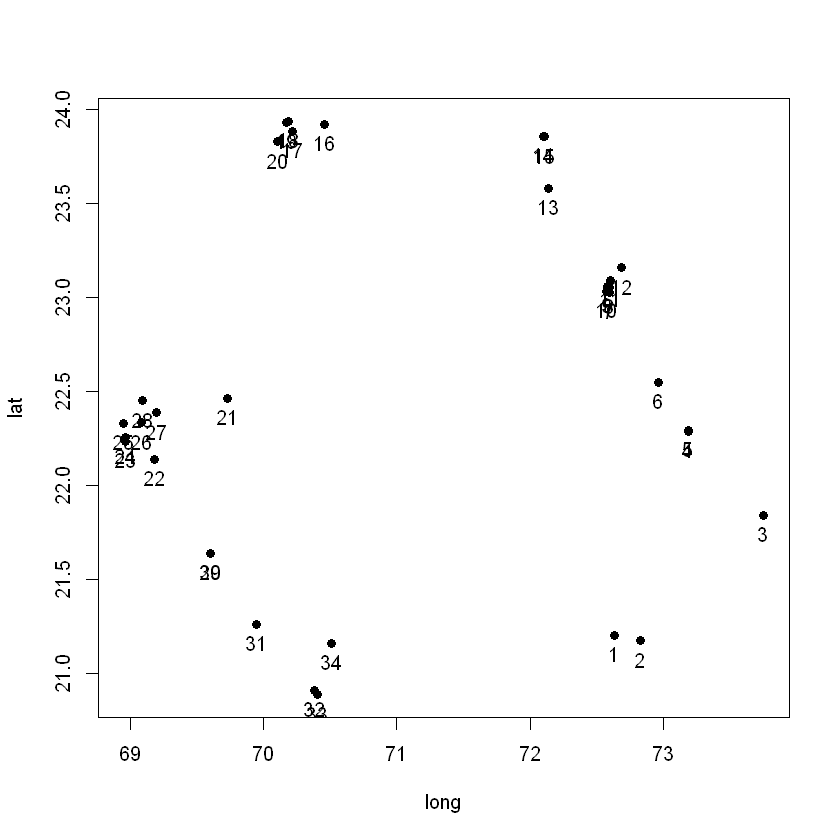

In [7]:
plot(INGUJ.df[, cLongLat], pch=19) # plot(INGUJ.df$lat, INGUJ.df$long)
  text(INGUJ.df[, cLongLat], pos=1) # , col="blue"

In [8]:
tours <- list()
tours[[1]] <- solve_TSP(tsp) # method= [default: "arbitrary insertion" algorithm with two_opt refinement.]

# reformulate_ATSP_as_TSP() # coz Concorde solver does not support ATSP.
## run concorde in verbose mode (-v) with fast cuts only (-V)
tours[[2]] <- solve_TSP(tsp, method = "concorde", control = list(clo = "-v -V"))
# tours <- lapply(methods, FUN = function(m) solve_TSP(tsp, method = m))
# names(tours) <- methods

Used control parameters by 'NA' 
clo	 =  -v -V
exe	 =  F:\www-since2022Nov\concorde-linkern/concorde
precision	 =  6
verbose	 =  TRUE
keep_files	 =  FALSE



[1] "Head, length, tail, and plot for tour 1:"
                                                           Sabarmati Riverfront Walkway W, Ahmedabad, Gujarat 
                                                                                                           10 
    Shree Swaminarayan Mandir Kalupur, Swaminarayan Mandir Road, Old City, Kalupur, Ahmedabad, Gujarat 380001 
                                                                                                            7 
                                                     Dr. Kurien's Museum, Popati Nagar, Anand, Gujarat 388001 
                                                                                                            6 
                                            Laxmi Vilas Palace, J N Marg, Moti Baug, Vadodara, Gujarat 390001 
                                                                                                            5 
                       Maharaja Fateh Singh Museum, Jawaharlal Ne

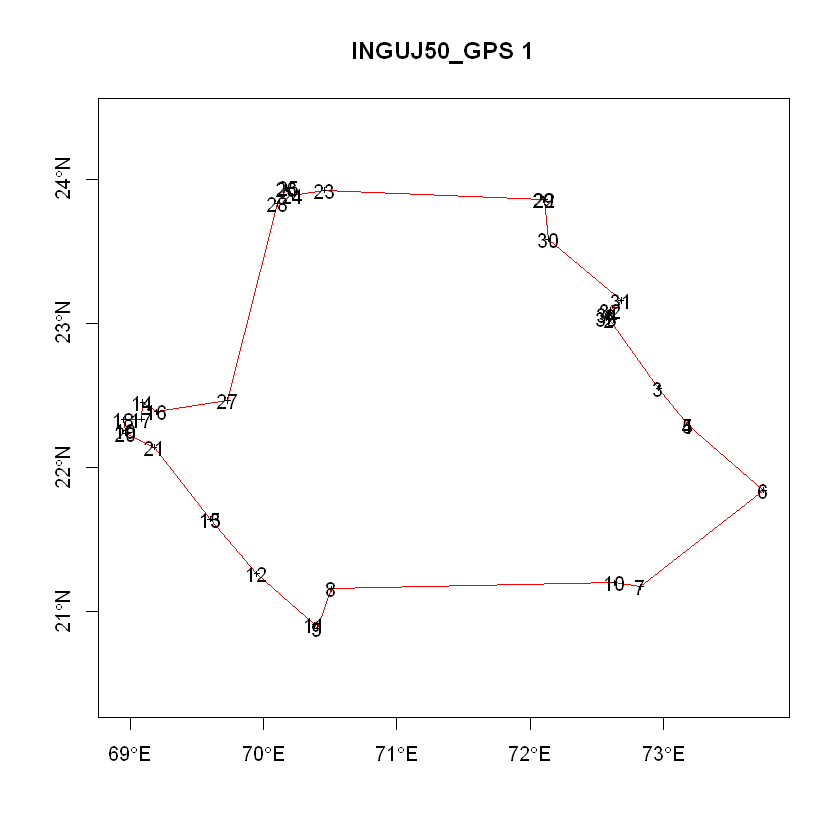

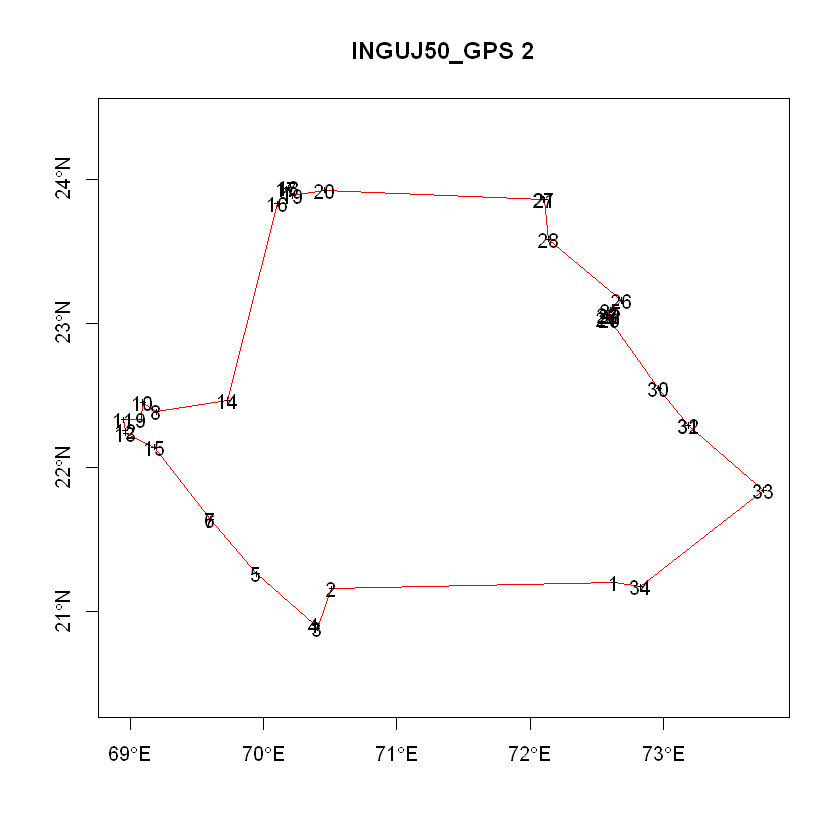

In [9]:
for(i in 1:length(tours)){
  print(paste0("Head, length, tail, and plot for tour ", i, ":"))
  tour <- tours[[i]]
  print(head(tour, n = 6))
  print(paste0(tour_length(tour), "m"))
  print(tail(tour, n = 6))
  # plot(tour) # Was: plot(tsp, tour)
  mapTour(tour, INGUJ.df, paste(fName, i), xlim=c(10,25), ylim=c(60,80))
}

In [10]:
### Inferential takeaways from this analysis:
# Tour chart "INGUJ50_GPS 2" shows a path and spot sequence (permutation) that nearly matches the real tour given in www links
#   (and as per data order), except that it cycles back to starting spot, whereas the real tour chose airports near both ends.
# Tour chart "INGUJ50_GPS 1" chooses a cyclic tour from and to a different spot (and airport).
# (Spatial) Tour lengths of around 1400km vs. real tour length of around 1900km suggest a
#   spatial:road::1:1.33 estimate proportion.

In [11]:
date(); sessionInfo()

[1] "Mon Nov  7 10:21:50 2022"

R version 4.2.0 (2022-04-22 ucrt)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 8.1 x64 (build 9600)

Matrix products: default

locale:
[1] LC_COLLATE=English_India.1252  LC_CTYPE=English_India.1252   
[3] LC_MONETARY=English_India.1252 LC_NUMERIC=C                  
[5] LC_TIME=English_India.1252    

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] maptools_1.1-4 rgeos_0.5-9    gpclib_1.5-6   maps_3.4.0     sp_1.4-7      
[6] sf_1.0-8       TSP_1.2-1     

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.8.3       pillar_1.8.1       compiler_4.2.0     base64enc_0.1-3   
 [5] iterators_1.0.14   class_7.3-20       tools_4.2.0        digest_0.6.29     
 [9] uuid_1.1-0         lattice_0.20-45    jsonlite_1.8.0     evaluate_0.15     
[13] lifecycle_1.0.1    tibble_3.1.8       pkgconfig_2.0.3    rlang_1.0.2       
[17] foreach_1.5.2      IRdisplay_1.1      DBI_1.1.3          cli_3.3.0 